In [42]:
import pandas as pd
train_df = pd.read_csv('train.csv')
train_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [16]:
train_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [3]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2024-11-15 08:39:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

     0K .......... .......... .......... .......... ..........  0% 93.9K 2h29m
    50K .......... .......... .......... .......... ..........  0%  209K 1h48m
   100K .......... .......... .......... .......... ..........  0% 1.87M 74m33s
   150K .......... .......... .......... .......... ..........  0% 1.00M 59m20s
   200K .......... .......... .......... .......... ..........  0%  269K 57m53s
   250K .......... .......... .......... .......... ..........  0% 2.13M 49m18s
   300K .......... .......... .......... .......... ..........  0%  246K 50m24s
   350K .......... .......... .......... .......... ..........  0%

In [17]:
import numpy as np
words = {}
def add_to_dict(words, filename):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line = line.strip().split(' ')
            try:
                words[line[0]] = np.array(line[1:], dtype=float)
            except:
                continue
add_to_dict(words, 'glove.6B.50d.txt')

words

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.1

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Rabo
[nltk_data]     Yusuf\AppData\Roaming\nltk_data...


True

In [21]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [26]:

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Rabo
[nltk_data]     Yusuf\AppData\Roaming\nltk_data...


True

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('feet')

'foot'

In [31]:
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lowercased = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased]
    useful_tokens = [t for t in lemmatized_tokens if t in words]
    return useful_tokens
message_to_token_list('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [40]:
def message_to_word_vectors(message, word_dict=words):
    processed_list_of_tokens = message_to_token_list(message)
    vectors = []
    for tokens in processed_list_of_tokens:
        if tokens not in word_dict:
            continue
        else:
            vector_token = word_dict[tokens]
            vectors.append(vector_token)
    return np.array(vectors,dtype=float)
message_to_word_vectors('@user when a father is dysfunctional and is').shape

(8, 50)

In [43]:
train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(22373, 4794, 4795)

In [44]:
train_df

,id,label,tweet
0,267,0,i'll probably be 30 by the time @user comes ba...
1,20461,0,just finished recoding my audition for abc dic...
2,18134,0,"this will be dustin's bihday present, bihday dj,"
3,15418,0,"this is my ""do i really have to go to work fac..."
4,3078,0,eat the all #muslm
...,...,...,...
22368,24753,0,. #smiles..... it's simple really #christiana...
22369,17111,0,there is no secret here! we really are trying ...
22370,21880,0,@user one more exam left! #euro2016 #byesch...
22371,4883,0,what's a father's day without your papi?


In [45]:
def df_to_X_y(dff):
  y = dff['label'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['tweet']:
    message_as_vector_seq = message_to_word_vectors(message)

    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 50))

    all_word_vector_sequences.append(message_as_vector_seq)

  return all_word_vector_sequences, y

In [46]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

22373 13


In [47]:
print(len(X_train), len(X_train[2]))

22373 7


(array([3.493e+03, 7.017e+03, 6.723e+03, 3.786e+03, 1.182e+03, 1.610e+02,
        7.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <BarContainer object of 10 artists>)

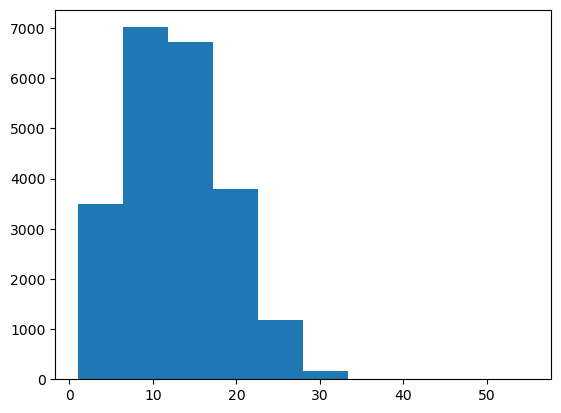

In [48]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [49]:
pd.Series(sequence_lengths).describe()

count    22373.000000
mean        12.692308
std          5.929912
min          1.000000
25%          8.000000
50%         12.000000
75%         17.000000
max         55.000000
dtype: float64

In [50]:
from copy import deepcopy

def pad_X(X, desired_sequence_length=57):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len

    pad = np.zeros(shape=(sequence_length_difference, 50))

    X_copy[i] = np.concatenate([x, pad])

  return np.array(X_copy).astype(float)

In [51]:
X_train = pad_X(X_train)

X_train.shape

(22373, 57, 50)

In [52]:
y_train.shape

(22373,)

In [53]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((4794, 57, 50), (4794,))

In [54]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((4795, 57, 50), (4795,))

In [55]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(57, 50)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 57, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3648)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         3,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,137 (387.25 KB)

 Trainable params: 99,137 (387.25 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

# Update the filepath with a .keras extension
cp = ModelCheckpoint('model/best_model.keras', save_best_only=True)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy', AUC(name='auc')]
)


In [59]:
frequencies = pd.value_counts(train_df['label'])

frequencies

0    20820
1     1553
Name: label, dtype: int64

In [60]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

{0: 1.0745917387127761, 1: 14.406310367031551}

In [61]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)

Epoch 1/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.8079 - auc: 0.7442 - loss: 1.1368 - val_accuracy: 0.7737 - val_auc: 0.8950 - val_loss: 0.4886
Epoch 2/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8128 - auc: 0.8969 - loss: 0.8211 - val_accuracy: 0.8433 - val_auc: 0.9024 - val_loss: 0.3740
Epoch 3/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8324 - auc: 0.9124 - loss: 0.7467 - val_accuracy: 0.7320 - val_auc: 0.9042 - val_loss: 0.5431
Epoch 4/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8253 - auc: 0.9109 - loss: 0.7580 - val_accuracy: 0.8292 - val_auc: 0.9083 - val_loss: 0.3994
Epoch 5/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.8438 - auc: 0.9198 - loss: 0.7133 - val_accuracy: 0.7897 - val_auc: 0.9105 - val_loss: 0.4758
Epoch 6/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8349 - auc: 0.9191 - loss: 0.7363 - val_accuracy: 0.8698 - val_auc: 0.9106 - val_loss: 0.3119
Epoch 7/20
700/700 ━━━━━━━━━

In [73]:
import tensorflow as tf

# Load the SavedModel
best_model = tf.keras.models.load_model('./model/best_model.keras')

# Confirm the model's architecture
best_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 57, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3648)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         3,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,413 (1.13 MB)

 Trainable params: 99,137 (387.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 198,276 (774.52 KB)

In [74]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4454
           1       0.37      0.79      0.51       341

    accuracy                           0.89      4795
   macro avg       0.68      0.84      0.72      4795
weighted avg       0.94      0.89      0.91      4795

